In [ ]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load the dataset
df = pd.read_csv('/content/training_data.csv', sep=':')
df.head()

,x,x2,y
0,-0.228788,-2.287877,3.506056
1,-0.094669,-0.946690,0.782723
2,-0.956651,-9.566513,3.045309
3,-1.984509,-19.845088,3.063300
4,0.386115,3.861152,5.548161


In [ ]:
max(df['x']), min(df['x'])

(9.846537920515935, -3.4441078589665586)

In [ ]:
max(df['y']), min(df['y'])

(11.521694010655613, -0.07551805738411366)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       998 non-null    float64
 1   x2      998 non-null    float64
 2   y       998 non-null    float64
dtypes: float64(3)
memory usage: 23.6 KB


In [ ]:
df.shape

(1000, 3)

In [ ]:
df.isnull().sum()

x     2
x2    2
y     2
dtype: int64

In [ ]:
# out of 1000 data only 2 null values, so we can drop it instead of replacing the values with mean or median
df.dropna(how='all', inplace=True)
df.shape

(998, 3)

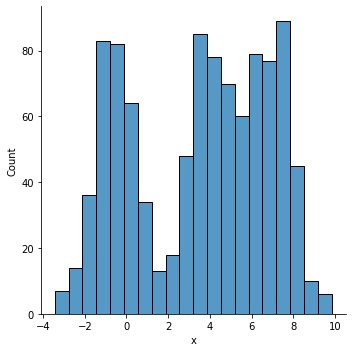

In [ ]:
# adjust bin sizes to get more insight into the data
sns.displot(df, x='x', bins=20, ax=ax2)

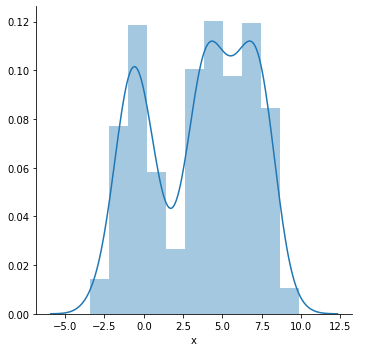

In [ ]:
sns.FacetGrid(df, size=5) \
   .map(sns.distplot, "x") \
   .add_legend();
plt.show();

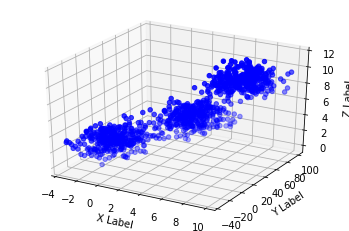

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x'], df['x2'], df['y'], c='b', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

fig.savefig('3D.png')

In [ ]:
df.corr()

,x,x2,y
x,1.000000,1.000000,0.837319
x2,1.000000,1.000000,0.837319
y,0.837319,0.837319,1.000000


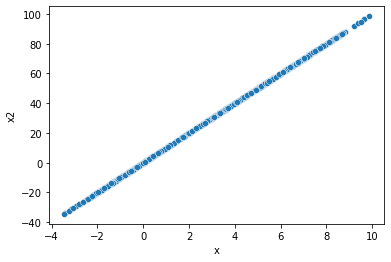

In [ ]:
reln = sns.scatterplot(x='x',y='x2', data=df)
reln.figure.savefig("corr.png")

In [ ]:
# high correlation between x and x2
# should drop one to avoid multi-collinearity

In [ ]:
df.drop(columns=['x2'],inplace=True)

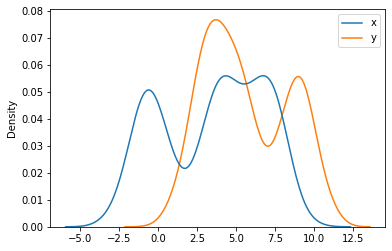

In [ ]:
sns.kdeplot(data=df)

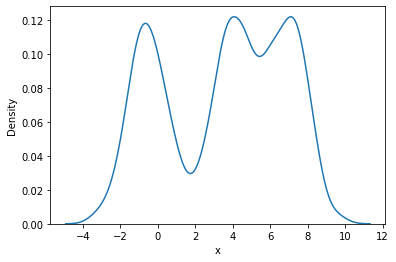

In [ ]:
# will have to adjust to get the right distribution shape
sns.kdeplot(data=df, x='x', bw_adjust=.6)
# bin_size do not matter in density curves

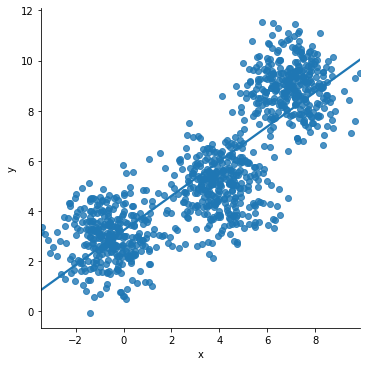

In [ ]:
sns.lmplot (x ='x',y='y', data=df, ci=None)

In [ ]:
test = pd.read_csv('/content/test.csv',sep=':')
test.corr()

,x,x2,y
x,1.000000,0.025321,0.860957
x2,0.025321,1.000000,-0.026077
y,0.860957,-0.026077,1.000000


In [ ]:
test.isnull().sum()
test.drop(columns='x2', inplace=True)

In [ ]:
test.shape

(100, 2)

In [ ]:
test.head()

,x,y
0,-0.821028,3.041248
1,0.527371,4.144785
2,-1.197672,2.934602
3,-1.463280,2.155245
4,-0.621374,4.812140


In [ ]:
X = df['x']
y = df['y']

In [ ]:
X_train = np.array(X).reshape(-1,1)
y_train = np.array(y).reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_test = np.array(test['x']).reshape(-1,1)
y_test = np.array(test['y']).reshape(-1,1)

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
from sklearn import metrics
mse=metrics.mean_squared_error(y_test,y_pred)
mse

2.0823154470875016

In [ ]:
regressor.score(X_test,y_test)


0.7368670519743232

In [ ]:
from numpy import cov
covariance = cov(df['x'],df['y'])
print(covariance)

[[10.6981134   7.38472142]
 [ 7.38472142  7.27074072]]


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.1682115906334039
MSE: 2.0823154470875016
RMSE: 1.4430230237551658


In [ ]:
from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha=0.15) 
RidgeModel.fit(X_train, y_train)
RidgeModel.score(X_test, y_test)

0.7368656555466215

In [ ]:
prediction=RidgeModel.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1.1682135934436935
MSE: 2.0823264977863802
RMSE: 1.4430268527599825


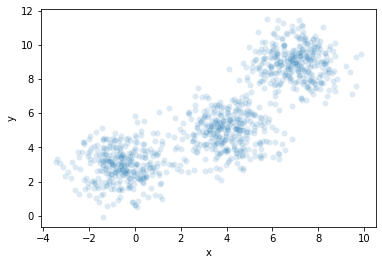

In [ ]:
sns_plot = sns.scatterplot(x='x', y='y', alpha=0.15, data=df)
sns_plot

In [ ]:
# since the data seems to be arranged in clusters, knn regressor might reduce rmse
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, y_train)
y_pred=neigh.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.9595237389977145
MSE: 1.5718669015668647
RMSE: 1.253741162109175


In [ ]:
rmse = []
for i in range(1,8):
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train,y_train)
    pred_i = neigh.predict(X_test)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,pred_i)))

In [ ]:
rmse

[1.7453303810263132,
 1.4464385037901997,
 1.2661801640045007,
 1.2855521573073807,
 1.253741162109175,
 1.264460932984531,
 1.2515158062071103]

Text(0, 0.5, 'rmse')

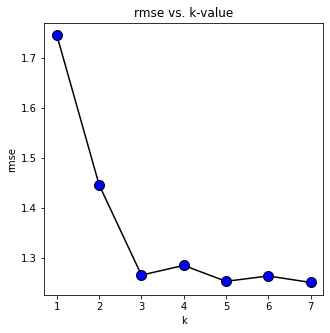

In [ ]:
%matplotlib inline
plt.figure(figsize=(5,5))
plt.plot(range(1,8),rmse,color='black',marker='o',markersize=10,mfc='blue')
plt.title('rmse vs. k-value')
plt.xlabel('k')
plt.ylabel('rmse')

In [ ]:
prediction = neigh.predict([[0.2]])
prediction[0][0]

5.201833231447899

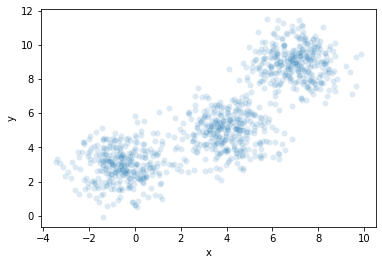

In [ ]:
sns_plot = sns.scatterplot(x='x', y='y', alpha=0.15, data=df)
sns_plot

In [ ]:
sns_plot.figure.savefig("clusters.png")

In [ ]:
# trying by splitting(clusters) for training data
clst_1 = df[(df['x']<=2.2)]
clst_2 = df[(df["x"]>= 2.2) & (df['x']<=7) & (df['y']<=7)]
clst_3 = df[(df["x"]>= 5.5) & (df['y']>=6)]

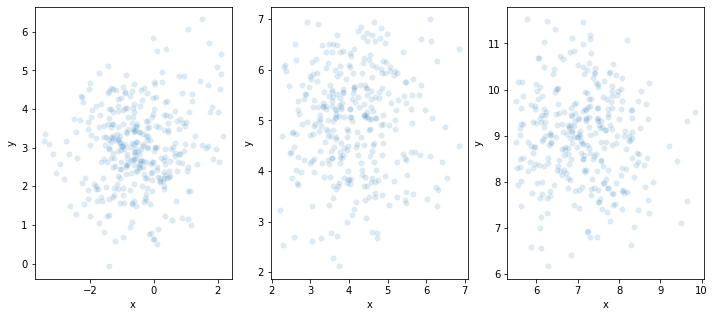

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3,figsize=(12,5))
sns.scatterplot(x='x',y='y', data=clst_1, alpha=0.15, ax=ax1)
sns.scatterplot(x='x',y='y', data=clst_2, alpha=0.15, ax=ax2)
sns.scatterplot(x='x',y='y', data=clst_3, alpha=0.15, ax=ax3)

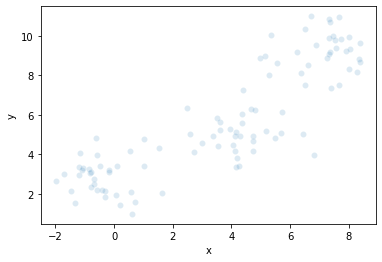

In [ ]:
sns.scatterplot(x='x', y='y', alpha=0.15, data=test)

In [ ]:
test_1 = test[(test['x']<=2.2)]
test_2 = test[(test["x"]>= 2.2) & (test['x']<=7) & (test['y']<=7)]
test_3 = test[(test["x"]>= 5.5) & (test['y']>=7)]

In [ ]:
X_test = np.array(test_2['x']).reshape(-1,1)
y_test = np.array(test_2['y']).reshape(-1,1)

In [ ]:
X = clst_2['x']
y = clst_2['y']

In [ ]:
X_train = np.array(X).reshape(-1,1)
y_train = np.array(y).reshape(-1,1)

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred=neigh.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.8128673305562958
MSE: 1.0687045798390624
RMSE: 1.033781688674675
